In [1]:
from cells import layer_v_with_ais_test 
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload

reload(layer_v_with_ais_test )
cell = layer_v_with_ais_test.SPI6()

# Rheobase Experiment

This Rheobase Experiment Plots every result with its according cure

In [4]:
parammaps = [{"delay":100,"dur":500,"amp": -0.2 + i*2*0.025} for i in range(0,10)]
outputs = []

for param in parammaps:
    cell = layer_v_with_ais_test.SPI6()
    singlepulse = h.IClamp(cell.soma(0.5))
    singlepulse.delay = param["delay"]
    singlepulse.dur = param["dur"]
    singlepulse.amp = param["amp"]

    v_vec = h.Vector()             # Membrane potential vector
    t_vec = h.Vector()  
    v2_vec = h.Vector()# Time stamp vector
    v_vec.record(cell.soma(0.5)._ref_v)
    t_vec.record(h._ref_t)

    h.tstop = 800
    h.run()
    outputs.append({"v": np.array(v_vec), "t": np.array(t_vec)})

# Plot

Plotting the Results

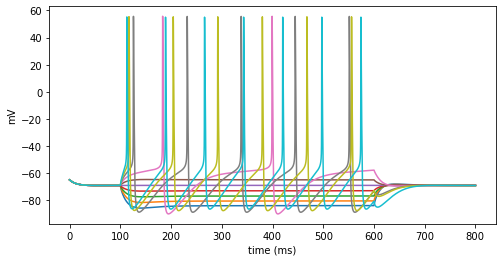

In [5]:
from matplotlib import pyplot
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
for el in outputs[0:10]: 
    pyplot.plot(el["t"], el["v"])
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()

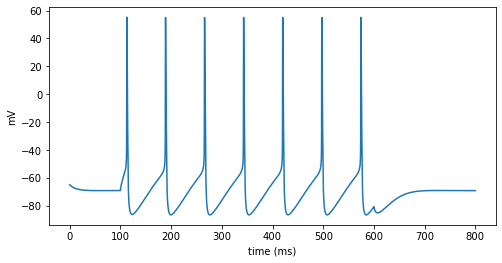

In [17]:
# One Trace
import numpy as np
el = outputs[9]
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(el["t"], el["v"])
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()

# Calculate Rheobase

Calculating the Rheobase through iterating until first action potential is generated

In [2]:
from helpers.rheobase import *

over, under = calculateRheobase(layer_v_with_ais_test.SPI6)

Intial guess -0.2
Running in range  0.6000000000000001 from  -0.2 to  0.4000000000000001
Detected first AP at 0.10000000000000003  [mv]
Intial guess 0.10000000000000003
Running in range  0.03000000000000001 from  0.07000000000000002 to  0.13000000000000003
Detected first AP at 0.09700000000000003  [mv]
Intial guess 0.09700000000000003
Running in range  0.002910000000000001 from  0.09409000000000003 to  0.09991000000000003
Detected first AP at 0.09612700000000003  [mv]


In [3]:
from helpers.stimulation import *

underplot= stimulate(layer_v_with_ais_test.SPI6, under)
overplot= stimulate(layer_v_with_ais_test.SPI6, over)

## Plotting of the acquired Tracks

With the help of matplotlib

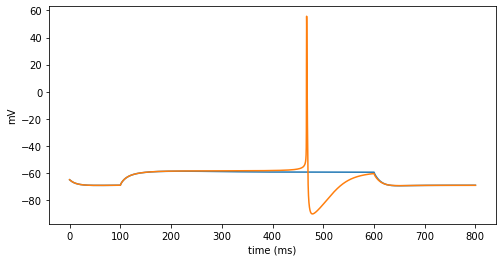

In [10]:
# One Trace
from helpers import generic
reload(generic)
generic.plotTraces([underplot,overplot])

## Plotting of the initial AP

Plots the first AP that is being genarated by the Plot

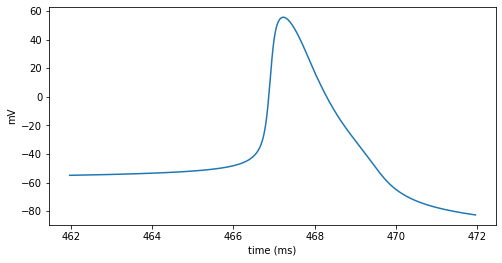

In [11]:
from helpers.generic import isolateTime, plotTrace

firstpeaktime = overplot["aps"][0]
newtrace = isolateTime(overplot, firstpeaktime)
plotTrace(newtrace)


## Calculate the Input Resistance

In [9]:
from helpers.generic import *
        

In [10]:
inputresistances = calculateInputResistance(layer_v_with_ais_test.SPI6)
inputresistances.mean()

-69.08122230039154
-68.23696248026413 0.01
-67.38295747016006 0.02
-66.52079419132369 0.03
-65.64566712647617 0.04
-64.7498065652228 0.05
-63.820100457004735 0.06


85.81489754460289

-69.08122230039154
-68.23696248026413 0.01
-67.38295747016006 0.02
-66.52079419132369 0.03
-65.64566712647617 0.04
-64.7498065652228 0.05
-63.820100457004735 0.06


85.81489754460289

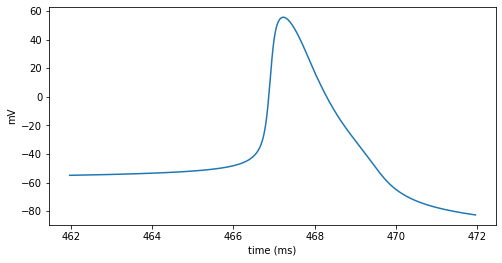

In [54]:
# One Trace
import numpy as np

pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(isolatedapt, isolatedapv)
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show()
    